In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [2]:
# read in csv exported from notebook 1
df = pd.read_csv('SA17A-contr.csv', index_col=0)
df.head()

,cand_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
0,"Trump, Donald J.",WASHINGTON,20008,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,250.0,2016-12-10,SA17A,SA17A.425120,G2016
23,"Trump, Donald J.",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-01-03,SA17A,SA17A.1061963,P2020
26,"Trump, Donald J.",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-04-03,SA17A,SA17A.1274477,P2020
29,"Trump, Donald J.",WASHINGTON,20037,RETIRED,RETIRED,100.0,2017-12-30,SA17A,SA17A.1019056,P2020
41,"Trump, Donald J.",WASHINGTON,20007,CADWALADER,ATTORNEY,-2700.0,2017-01-20,SA17A,SA17A.445455,G2016


In [3]:
# check datatypes 
df.dtypes

cand_nm               object
contbr_city           object
contbr_zip             int64
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
form_tp               object
tran_id               object
election_tp           object
dtype: object

In [4]:
# convert zip to 5 num string 
df['contbr_zip'] = df.contbr_zip.astype('str')
df.contbr_zip = df['contbr_zip'].apply(lambda x: x[0:5])

In [5]:
# convert receipt date to datetime format 
df.contb_receipt_dt = pd.to_datetime(df.contb_receipt_dt)
df.dtypes

cand_nm                      object
contbr_city                  object
contbr_zip                   object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
form_tp                      object
tran_id                      object
election_tp                  object
dtype: object

In [6]:
# filter out amounts less than $1 
df = df.loc[df.contb_receipt_amt > 0]
df.head()

,cand_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp
0,"Trump, Donald J.",WASHINGTON,20008,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,250.0,2016-12-10,SA17A,SA17A.425120,G2016
23,"Trump, Donald J.",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-01-03,SA17A,SA17A.1061963,P2020
26,"Trump, Donald J.",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-04-03,SA17A,SA17A.1274477,P2020
29,"Trump, Donald J.",WASHINGTON,20037,RETIRED,RETIRED,100.0,2017-12-30,SA17A,SA17A.1019056,P2020
42,"Trump, Donald J.",WASHINGTON,20007,ICF,CONSULTANT,35.0,2018-06-19,SA17A,SA17A.1289423,P2020


In [13]:
# standard scaling
outcome = 'cand_nm'
x_cols = ['contb_receipt_amt']
# for col in x_cols:
#       df[col] = (df[col] - df[col].mean())/df[col].std()
df.describe()
df.head()

,cand_nm,contbr_city,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,tran_id,election_tp,cand_val
0,"Trump, Donald J.",WASHINGTON,20008,"NICHOLS DESIGN ASSOCIATES, INC.",ARCHITECT,250.0,2016-12-10,SA17A,SA17A.425120,G2016,1
23,"Trump, Donald J.",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-01-03,SA17A,SA17A.1061963,P2020,1
26,"Trump, Donald J.",WASHINGTON,20007,RETIRED,RETIRED,35.0,2018-04-03,SA17A,SA17A.1274477,P2020,1
29,"Trump, Donald J.",WASHINGTON,20037,RETIRED,RETIRED,100.0,2017-12-30,SA17A,SA17A.1019056,P2020,1
42,"Trump, Donald J.",WASHINGTON,20007,ICF,CONSULTANT,35.0,2018-06-19,SA17A,SA17A.1289423,P2020,1


In [9]:
# create function to split data into republican (1) vs democrat (0)
def trump(val):
    if val == 'Trump, Donald J.':
        val = 1  
    else:
        val = 0 
    return val

In [10]:
# apply the trump function to make cand_val column binary 
df['cand_val'] = df.cand_nm.apply(lambda x: trump(x))
df.describe()

,contb_receipt_amt,cand_val
count,11945.000000,11945.000000
mean,217.636329,0.024697
std,652.847473,0.155205
min,0.010000,0.000000
25%,25.000000,0.000000
50%,50.000000,0.000000
75%,100.000000,0.000000
max,41800.720000,1.000000


In [12]:
# drop the max contb receipt amount from trump of $41K 
df = df.drop(df['contb_receipt_amt'].idxmax())

,contb_receipt_amt
cand_val,
0,215.430059
1,163.622585


In [15]:
# dropped biden's max value of 15K 
df = df.drop(df['contb_receipt_amt'].idxmax())
df.describe()

,contb_receipt_amt,cand_val
count,11943.000000,11943.000000
mean,212.916791,0.024617
std,512.995820,0.154961
min,0.010000,0.000000
25%,25.000000,0.000000
50%,50.000000,0.000000
75%,100.000000,0.000000
max,5600.000000,1.000000


In [16]:
# check republican vs democratic values 
df.cand_val.value_counts()

0    11649
1      294
Name: cand_val, dtype: int64

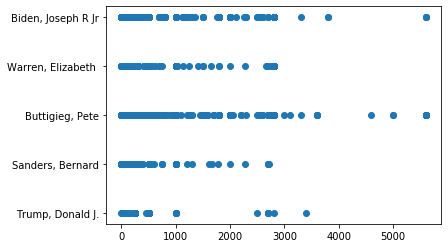

In [18]:
plt.scatter(df.contb_receipt_amt, df.cand_nm)
plt.show()

In [26]:
# We're going to split the train and test data and stratify by candidate name

X = df['contb_receipt_amt']
y = df['cand_nm']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2020, stratify = y, test_size = .2)


In [31]:
X = np.array(X).reshape(-1,1)

In [33]:
# preliminary logistic regression 
lr = LogisticRegression(solver='lbfgs',multi_class='auto')
lr.fit(X,y)


/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# # run linear regression on the 300 v 300 training data 
# # predictor variable 
# X = df['contb_receipt_amt']

# # target variable
# y = df['cand_val']

# X = sm.add_constant(X)
# model = sm.OLS(y,X, hasconst=False)
# result = model.fit()
# result.summary()

In [ ]:
# label encoder 
# one versus rest; one versus one (costly)
# read in scikit learn 
# linear models are sensitive to outliers; default is not always dropping outliers
# where is threshold? 
# don't include Delaware in DC-only data; they are noise; extreme values are noise 
# extreme values are illegal; can work only in legal values
# standardized outlier test ( p. 97)
# what do we do with the zip codes? Don't make it 50 different columns. 
# penalization (L1 and L2) requires penalization
# when do you do scaling? scale it in the train and apply to the test 
# sparse data set; many zeros and few ones
# go through everything very systematically and report everything 